In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0. Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#1. Mengambil data dari Shared drive

In [ ]:
# Folder directory
base_dir = '/content/drive/Shareddrives/Machine Learning/flowers'

##Splitting data ke Training dan Validation Directory
Cukup dieksekusi sekali, tidak perlu dieksekusi kalo folder training dan validation sudah ada di shared drive

###Membuat Directory dan sub direktori


In [ ]:
import shutil
import os

# Dir name
training_dir=os.path.join(base_dir,"training/")
validation_dir=os.path.join(base_dir,"validation/")     

dandelion_src=os.path.join(base_dir,"dandelion/")
rose_src=os.path.join(base_dir,"rose/")
sunflower_src=dandelion=os.path.join(base_dir,"sunflower/")

train_dandelion=os.path.join(training_dir,"dandelion/")
train_rose=os.path.join(training_dir,"rose/")
train_sunflower=os.path.join(training_dir,"sunflower/")

validation_dandelion=os.path.join(validation_dir,"dandelion/")
validation_rose=os.path.join(validation_dir,"rose/")
validation_sunflower=os.path.join(validation_dir,"sunflower/")

# Make Directory
try:
  #Run this to delete training and validation dir
  shutil.rmtree(training_dir)
  shutil.rmtree(validation_dir)

  #Root directory
  os.mkdir(training_dir)
  os.mkdir(validation_dir)

  #Training Subdir
  os.mkdir(train_dandelion)
  os.mkdir(train_rose)
  os.mkdir(train_sunflower)

  #Validation subdir
  os.mkdir(validation_dandelion)
  os.mkdir(validation_rose)
  os.mkdir(validation_sunflower)
except OSError:
    pass  

###Split data ke direktori train dan validation dengan subfolder untuk masing-masing jenis bunga

In [ ]:
import random

def split_data(SOURCE,TRAINING_DIR,VALIDATION_DIR,SPLIT_SIZE):
    data = os.listdir(SOURCE)
    #random data sample
    sample=random.sample(data, 5)
    print(sample)

    index_to_split=len(data)*SPLIT_SIZE
    #print(index_to_split)
    training_data = data[:int(index_to_split)]
    testing_data=data[int(index_to_split):]
    
    for image in training_data:
        #if os.path.getsize("{}{}".format(SOURCE,image))!=0:
        shutil.copyfile("{}{}".format(SOURCE,image), "{}{}".format(TRAINING_DIR,image))
        
    for image in testing_data:
        #if os.path.getsize("{}{}".format(SOURCE,image))!=0:
        shutil.copyfile("{}{}".format(SOURCE,image), "{}{}".format(VALIDATION_DIR,image)) 
    
   
#Split data and copy to subdir
split_size = .8
split_data(dandelion_src,train_dandelion,validation_dandelion,split_size)
split_data(rose_src,train_rose,validation_rose,split_size)
split_data(sunflower_src,train_sunflower,validation_sunflower,split_size)



['4588529727_4a79c61577.jpg', '3496258301_ca5f168306.jpg', '10437652486_aa86c14985.jpg', '1080179756_5f05350a59.jpg', '3419176626_512811d3ff.jpg']
['8723767157_c45bfd3ab6.jpg', '6363976189_e7155e5f9c.jpg', '5570018782_c56bee942f.jpg', '3065719996_c16ecd5551.jpg', '4754734410_94d98463a5.jpg']
['3568114325_d6b1363497.jpg', '6606746467_a668c8d417.jpg', '9655029591_7a77f87500.jpg', '4019748730_ee09b39a43.jpg', '8174935013_b16626b49b.jpg']


In [ ]:
print(len(os.listdir(train_dandelion)))
print(len(os.listdir(train_rose)))
print(len(os.listdir(train_sunflower)))

print(len(os.listdir(validation_dandelion)))
print(len(os.listdir(validation_rose)))
print(len(os.listdir(validation_sunflower)))

80
80
80
20
20
20


In [ ]:
training_dir=os.path.join(base_dir,"training")
validation_dir=os.path.join(base_dir,"validation")

#2. Image data Generator dengan Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255, # Normalisasi nilai input
                    horizontal_flip=True, # Melakukan flip horizontal untuk menambah data
                    height_shift_range=0.2, # Melakukan shift untuk menambah data
                    vertical_flip=True # Melakukan vertical flip untuk menambah data
                    )

validation_datagen = ImageDataGenerator(rescale=1/255)

#3. Train dan Validation Generator

In [ ]:
train_generator = train_datagen.flow_from_directory(
    training_dir, # direktori data
    target_size=(320, 240),  # mengubah resolusi gambar
    class_mode='categorical' # klasifikasi multi class
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, # Direktori data
    target_size=(320, 240), # mengubah resolusi gambar
    class_mode='categorical' # klasifikasi multi class
)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


#4. Model CNN

In [ ]:
model = tf.keras.models.Sequential() # Parameter

#Convo 1
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape = (320, 240, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
#Convo 2
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
#Convo 3
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
#Convo 4
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 318, 238, 16)      448       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 159, 119, 16)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 157, 117, 32)      4640      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 78, 58, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 76, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 38, 28, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 36, 26, 64)       

5. model compile CNN

In [ ]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy', # one hot encoding
              metrics=['accuracy'])

##6. Training 

In [ ]:
EPOCHS = 20

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/20
8/8 [==============================] - 6s 694ms/step - loss: 1.1003 - accuracy: 0.3625 - val_loss: 0.9984 - val_accuracy: 0.4667
Epoch 2/20
8/8 [==============================] - 5s 602ms/step - loss: 0.9142 - accuracy: 0.5750 - val_loss: 0.7842 - val_accuracy: 0.5833
Epoch 3/20
8/8 [==============================] - 5s 598ms/step - loss: 0.7550 - accuracy: 0.6125 - val_loss: 0.7948 - val_accuracy: 0.5500
Epoch 4/20
8/8 [==============================] - 5s 598ms/step - loss: 0.6993 - accuracy: 0.6750 - val_loss: 0.7448 - val_accuracy: 0.7000
Epoch 5/20
8/8 [==============================] - 5s 592ms/step - loss: 0.6036 - accuracy: 0.7167 - val_loss: 0.8345 - val_accuracy: 0.6167
Epoch 6/20
8/8 [==============================] - 5s 600ms/step - loss: 0.7012 - accuracy: 0.6875 - val_loss: 0.7948 - val_accuracy: 0.6167
Epoch 7/20
8/8 [==============================] - 5s 603ms/step - loss: 0.6066 - accuracy: 0.7417 - val_loss: 0.7751 - val_accuracy: 0.7167
Epoch 8/20
8/8 [====

#7. Plot Graph model

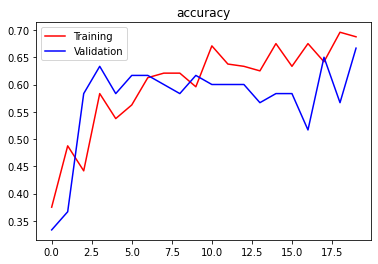

<Figure size 432x288 with 0 Axes>

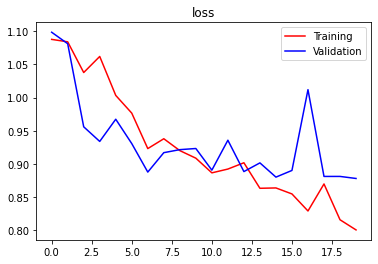

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

def plot_graph(n_epochs, string, history):
  epochs = range(n_epochs)
  plt.plot(epochs, history.history[string], 'r', label='Training')
  plt.plot(epochs, history.history['val_'+string], 'b', label='Validation')
  plt.title(string)
  plt.legend(loc=0)
  plt.figure()
  plt.show()

plot_graph(EPOCHS, 'accuracy', history)
plot_graph(EPOCHS, 'loss', history)